# Introduction

## Dataset

Database ini memiliki 57 atribut, tetapi yang paling relevan ada 10 atribut dari semuanya. Dataset ini berasal dari kaggle yaitu, Uber and Lyft Dataset Boston, MA dari 11-26-2018 hingga 12-18-2018.

Mengandung banyak nilai NA, tetapi data ini sangat ramah bagi pemula. Merupakan dataset yang cocok jika menggunakan Model Regresi untuk melihat prediktor(variabel) yang berbeda seperti hour (jam) dan price (harga).

## Tujuan

Final Project 1 ini kami buat guna untuk mengevaluasi konsep Regression sebagai berikut:\
● Mampu memahami konsep regression dengan Linear Regression\
● Mampu mempersiapkan data untuk digunakan dalam model Linear Regression\
● Mampu mengimplementasikan Linear Regression untuk membuat prediksi


# Import Libraries

cell pertama pada notebook hanya berisi semua library yang digunakan dalam project.

In [33]:
import pandas as pd
import numpy as np
import statistics
import statsmodels.api as sm
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline

from scipy import stats
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import r2_score, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error
pd.options.display.max_rows = None
pd.options.display.max_columns = None

# Data Loading

bagian ini berisi proses data loading.

In [36]:
df = pd.read_csv('C:/Users/ASUS/H8_Python_KS09_MSIB _3/FP1/dataset/rideshare_kaggle.csv')
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


# Data Cleaning

bagian ini berisi proses penyiapan data berupa data cleaning sebelum dilakukan explorasi data lebih lanjut. proses cleaning dapat berupa memberi nama baru untuk setiap kolom, mengisi missing values, menghapus kolom yang tidak dipakai, dan lain sebagainya.

In [37]:
#melihat dimensi data

df.shape

(693071, 57)

dari output diatas, dapat dilihat bahwa data ini berjumlah 69.3071 baris dan 57 kolom. lalu, akan dilanjutkan untuk melihat tipe data pada kolom.

In [38]:
#melihat tipe data pada kolom

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

dari output diatas, dapat dilihat bahwa kolom "datetime" masih bertipe object sehingga perlu dilakukan konversi tipe data menjadi date time. lalu, akan dilanjutkan mengubah tipe data kolom "datetime"

In [14]:
#ubah tipe data pada kolom "datetime"

df['datetime'] = pd.to_datetime(df['datetime'])

setelah diubah tipe datanya, langkah selanjutnya akan melihat kembali tipe data pada kolom "datetime" apakah sudah berubah menjadi tipe data yang sesuai.

In [39]:
#cek kembali tipe data pada kolom "datetime"

df["datetime"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 693071 entries, 0 to 693070
Series name: datetime
Non-Null Count   Dtype 
--------------   ----- 
693071 non-null  object
dtypes: object(1)
memory usage: 5.3+ MB


dari output diatas, dapat dilihat bahwa kolom "datetime" sudah memiliki tipe data yang sesuai, maka akan dilakukan pengecekan apakah ada missing value pada data tersebut.

In [16]:
#cek missing value

df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

dari output diatas, dapat dilihat bahwa kolom "price" memiliki missing value. maka akan dilakukan cleaning data agar data kolom tersebut dapat digunakan.

In [40]:
#cleaning data pada kolom "price"

df = df[df['price'].notnull()]
df.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

setelah dilakukan cleaning data pada kolom "price" sudah tidak terdapat missing value lagi. sehingga, langkah selanjutnya menghitung jumlah datanya.

In [17]:
#melihat dimensi data

df.shape

(693071, 57)

dari output diatas, dapat dilihat bahwa jumlah data sekarang sebesar 63.7976 dimana sebelumnya berjumlah 69.3071. sehingga data ini dapat digunakan, maka akan dilanjutkan ke tahap eksplorasi data.

# Eksplorasi Data

bagian ini berisi eksplorasi pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

## Analisis Waktu

bagian ini berisikan analisis waktu berdasarkan tanggal dan jam.

### Berdasarkan Tanggal

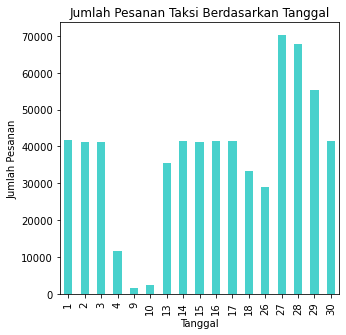

In [41]:
#plot jumlah pesanan taksi berdasarkan tanggal

df_day = df.pivot_table(
    index='day',
    values='id',
    aggfunc='count'
)
df_day.rename(columns={'id':'cab order count'}, inplace=True)
df_day.plot(kind='bar', color='mediumturquoise', figsize=(5, 5), legend=None)
plt.title('Jumlah Pesanan Taksi Berdasarkan Tanggal')
plt.ylabel('Jumlah Pesanan')
plt.xlabel('Tanggal')
plt.show()

**interpretasi**

berdasarkan plot diatas, dapat dilihat bahwa ada beberapa data tanggal yang kosong seperti pada tanggal 5-8, 11-12, dan 19-25.

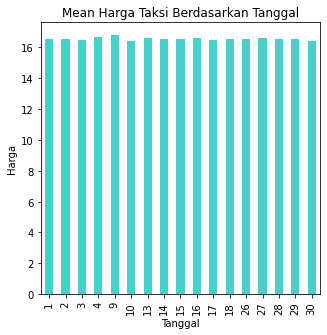

In [19]:
#plot mean harga taksi berdasarkan tanggal

df_day = df.pivot_table(
    index='day',
    values='price',
    aggfunc=np.mean
)
df_day.plot(kind='bar', color='mediumturquoise', figsize=(5, 5), legend=None)
plt.title('Mean Harga Taksi Berdasarkan Tanggal')
plt.ylabel('Harga')
plt.xlabel('Tanggal')
plt.show()

**interpretasi**

berdasarkan plot diatas, dapat dilihat bahwa mean harga taksi berdasarkan tanggal hampir bernilai sama diatas 16.

### Berdasarkan Jam

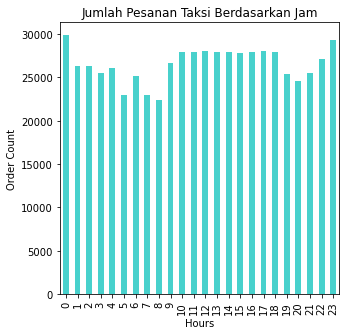

In [42]:
#plot jumlah pesanan taksi berdasarkan jam

df_hour = df.pivot_table(
    index='hour',
    values='id',
    aggfunc='count'
)
df_hour.rename(columns={'id':'cab order count'}, inplace=True)
df_hour.plot(kind='bar', color='mediumturquoise', figsize=(5, 5), legend=None)
plt.title('Jumlah Pesanan Taksi Berdasarkan Jam')
plt.ylabel('Order Count')
plt.xlabel('Hours')
plt.show()

**interpretasi**

berdasarkan plot diatas, dapat dilihat bahwa jumlah pesanan taksi tertinggi ada pada jam 23.00 - 00.00.

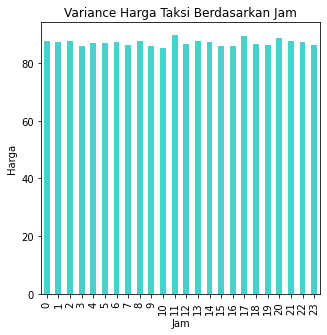

In [43]:
#plot variance taksi berdasarkan jam

df_hour = df.pivot_table(
    index='hour',
    values='price',
    aggfunc=statistics.variance
)
df_hour.plot(kind='bar', color='mediumturquoise', figsize=(5, 5), legend=None)
plt.title('Variance Harga Taksi Berdasarkan Jam')
plt.ylabel('Harga')
plt.xlabel('Jam')
plt.show()

**interpretasi**

berdasarkan output diatas, dapat dilihat bahwa variance harga taksi berdasarkan jam tidak memiliki perbedaan harga yang signifikan.

## Analisis Sumber & Destinasi

bagian ini berisikan analisis sumber dan destinasi berdasarkan jumlah pesanan taksi.

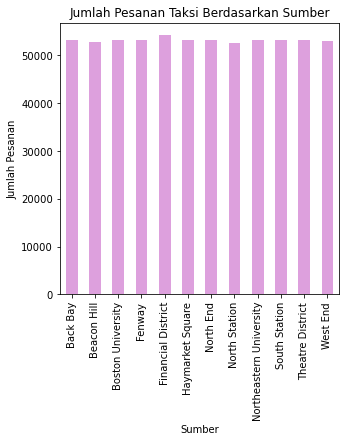

In [44]:
#plot jumlah pesanan taksi berdasarkan sumber

df_source = df.pivot_table(
    index='source',
    values='id',
    aggfunc='count'
)

df_source.plot(kind='bar', color='plum', figsize=(5, 5), legend=None)
plt.title('Jumlah Pesanan Taksi Berdasarkan Sumber')
plt.ylabel('Jumlah Pesanan')
plt.xlabel('Sumber')
plt.show()


**interpretasi**

berdasarkan plot diatas, dapat dilihat bahwa jumlah pesanan taksi berdasarkan sumber hampir memiliki jumlah pesanan yang sama.

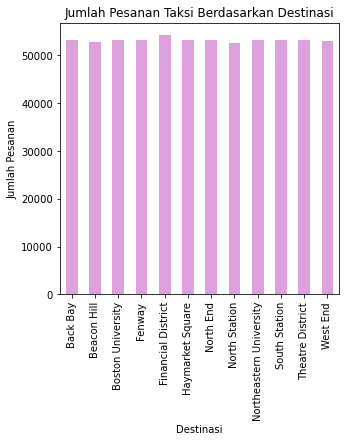

In [46]:
#plot jumlah pesanan taksi berdasarkan destinasi

df_destinasi = df.pivot_table(
    index='source',
    values='id',
    aggfunc='count'
)

df_destinasi.plot(kind='bar', color='plum', figsize=(5, 5), legend=None)
plt.title('Jumlah Pesanan Taksi Berdasarkan Destinasi')
plt.ylabel('Jumlah Pesanan')
plt.xlabel('Destinasi')
plt.show()

**interpretasi**

berdasarkan plot diatas, dapat dilihat bahwa jumlah pesanan taksi berdasarkan destinasi hampir memiliki jumlah pesanan yang sama.

## Analisis Tipe Taksi 

bagian ini berisikan analisis jumlah pesanan dan mean harga berdasarkan tipe taksi.

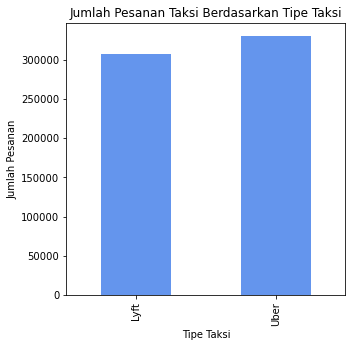

In [47]:
#plot jumlah pesanan taksi berdasarkan tipe taksi

df_type = df.pivot_table(
    index='cab_type',
    values='id',
    aggfunc='count',
)

df_type.plot(kind='bar', color='cornflowerblue',figsize=(5, 5), legend=None)
plt.title('Jumlah Pesanan Taksi Berdasarkan Tipe Taksi')
plt.ylabel('Jumlah Pesanan')
plt.xlabel('Tipe Taksi')
plt.show()

**interpretasi**

berdasarkan plot diatas, dapat dilihat bahwa tipe taksi Uber memiliki jumlah pesanan taksi tertinggi dibandingkan dengan tipe taksi Lyft.

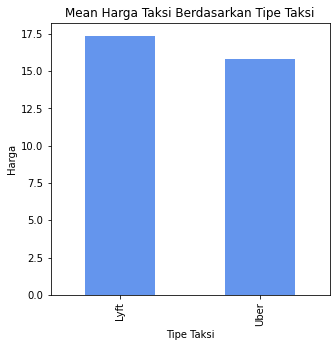

In [48]:
#plot mean harga berdasarkan tipe taksi

df_mtype = df.pivot_table(
    index='cab_type',
    values='price',
    aggfunc='mean'
)

df_mtype.plot(kind='bar', color='cornflowerblue', figsize=(5, 5), legend=None)
plt.title('Mean Harga Taksi Berdasarkan Tipe Taksi')
plt.ylabel('Harga')
plt.xlabel('Tipe Taksi')
plt.show()

**interpretasi**

berdasarkan plot diatas, dapat dilihat bahwa tipe taksi Lyft memiliki mean harga taksi tertinggi sedangkan Uber memiliki mean harga taksi terendah.

## Analisis Tipe Kendaraan

bagian ini berisikan analisis mean harga berdasarkan tipe kendaraan.

In [49]:
df_tipetaksi = df.pivot_table(
    index='name',
    values='price',
    aggfunc='mean'
)

df_tipetaksi

,price
name,
Black,20.523786
Black SUV,30.286763
Lux,17.771240
Lux Black,23.062468
Lux Black XL,32.324086
Lyft,9.610885
Lyft XL,15.309363
Shared,6.029893
UberPool,8.752500


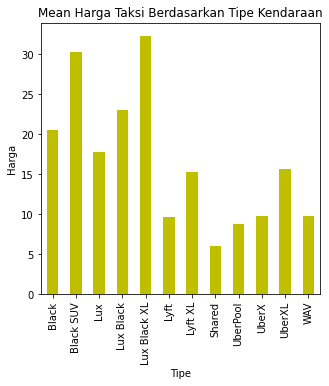

In [84]:
#plot mean harga berdasarkan tipe kendaraan

df_tipetaksi.plot(kind='bar', color='y', figsize=(5, 5), legend=None)
plt.title('Mean Harga Taksi Berdasarkan Tipe Kendaraan')
plt.ylabel('Harga')
plt.xlabel('Tipe')
plt.show()

**interpretasi**

berdasarkan plot dan tabel diatas, dapat dilihat bahwa tipe kendaraan termahal adalah Lux Black XL dengan mean harga perjalanannya sebesar 32.324086 dan tipe kendaraan termurahnya adalah Shared dengan mean harga perjalannya sebesar 6.029893.

# Correlation

pada bagian ini akan dilihat korelasi disetiap kolom, kemudian akan dipilih kolom yang memiliki korelasi baik untuk digunakan dalam model linier regression.

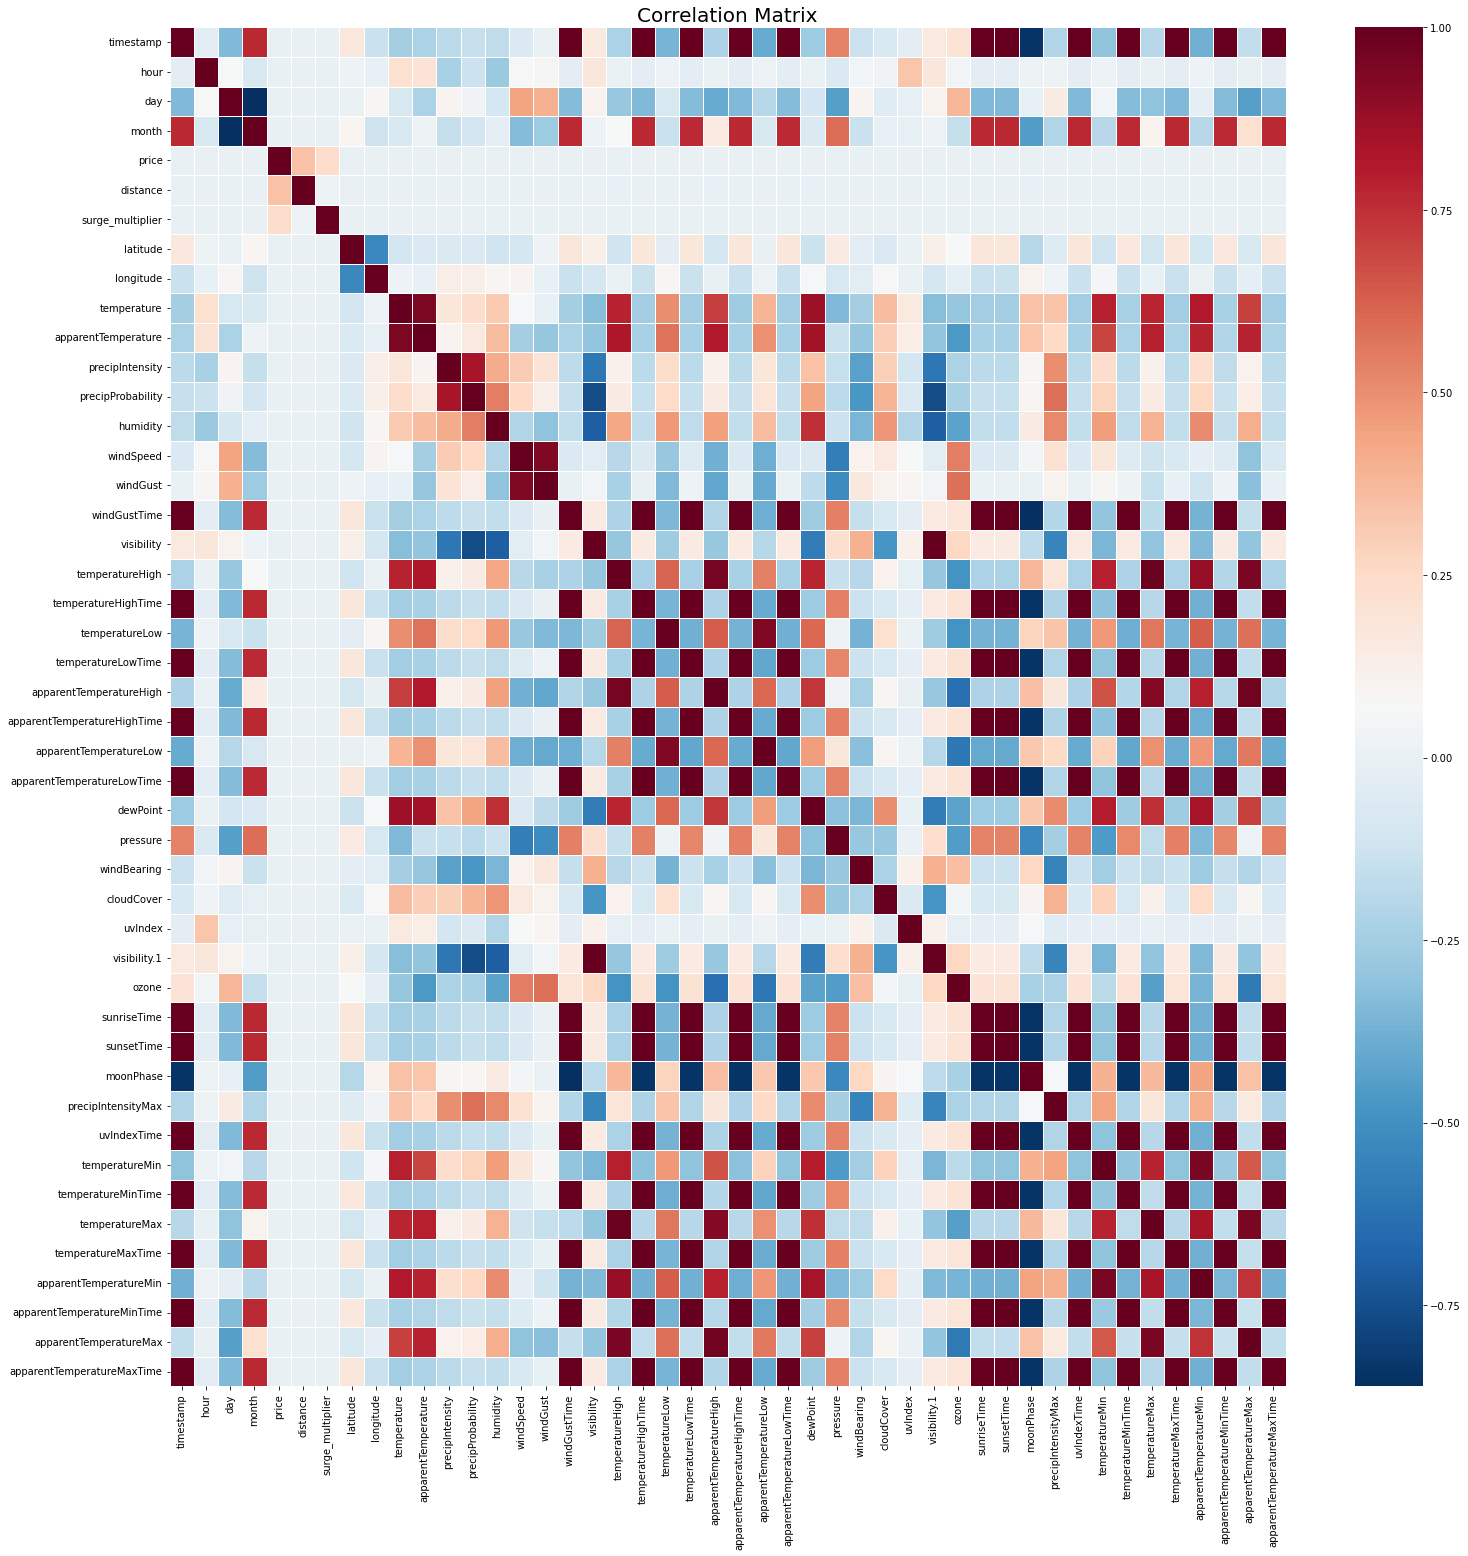

In [29]:
#melihat korelasi pada data kolom yang bertipe numerik

num_col_list = df.columns[(df.dtypes == 'int64') | (df.dtypes == 'float64')].to_list()
plt.figure(figsize = (25,25))
sns.heatmap(df[num_col_list].corr(), cmap="RdBu_r", linewidths=.5)
plt.title("Correlation Matrix", fontsize=20)
plt.show()

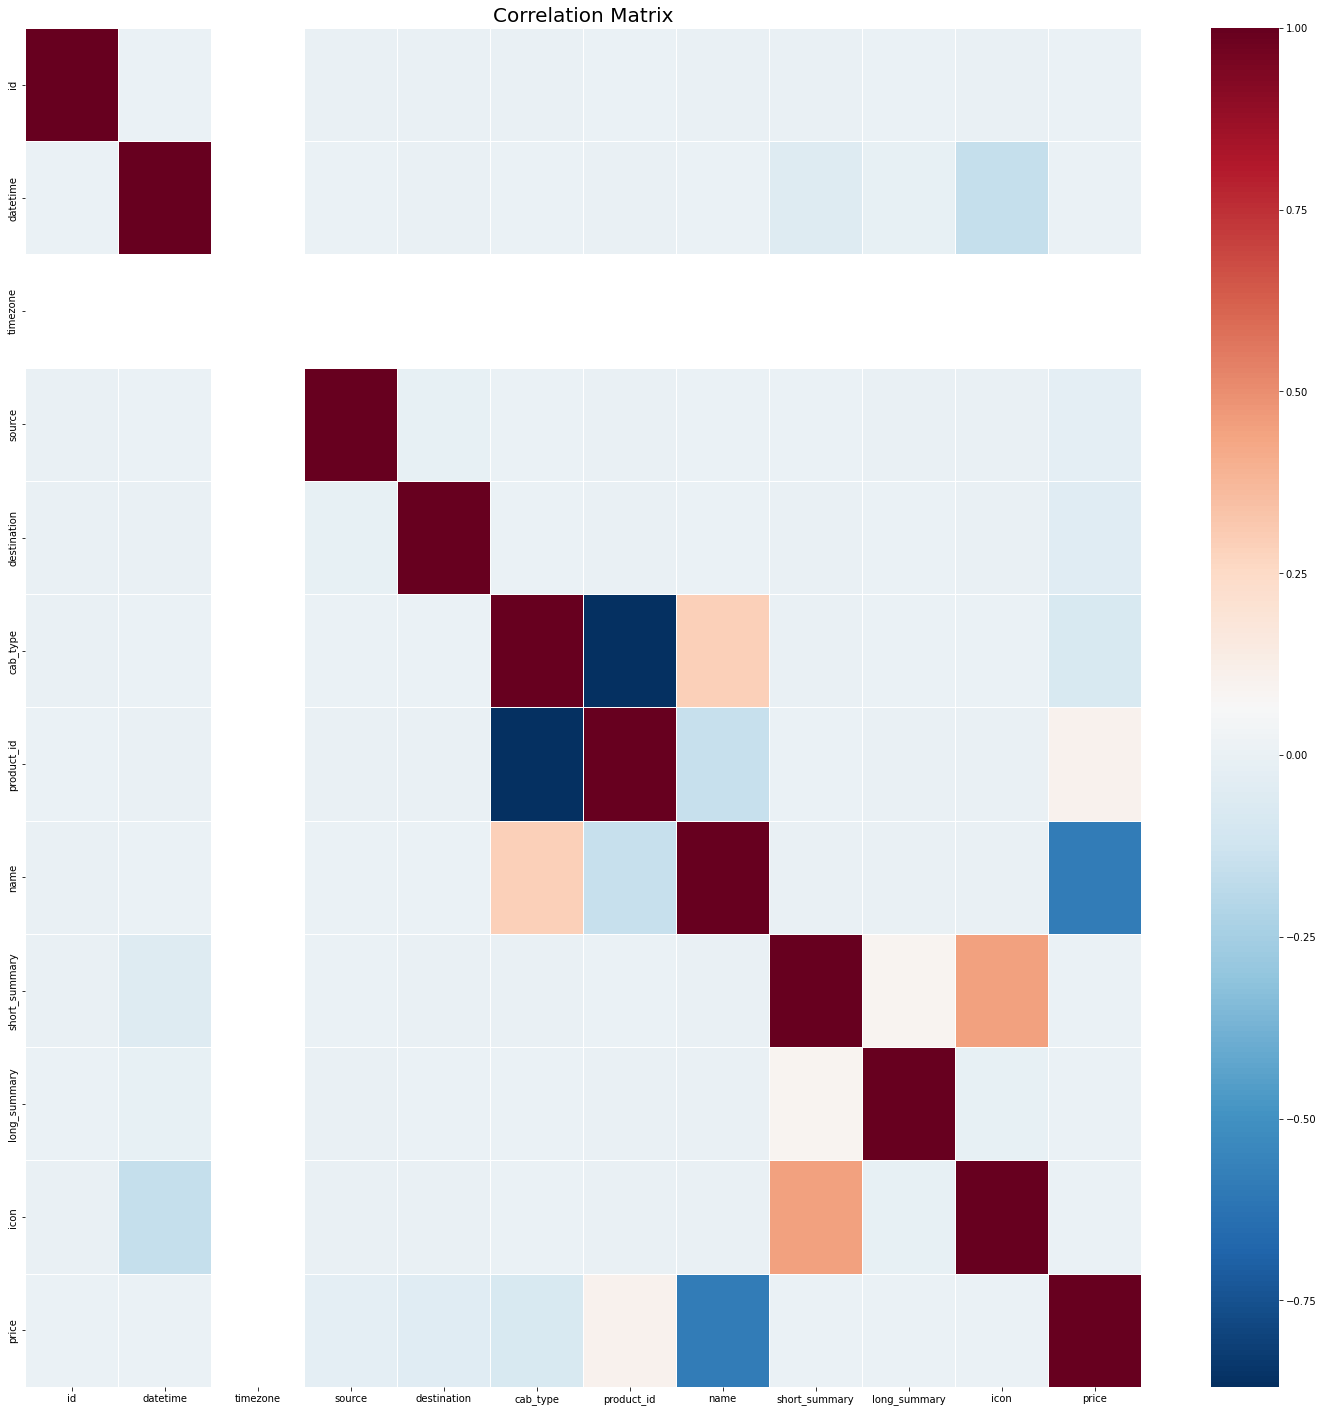

In [50]:
#melihat korelasi pada data kolom yang bertipe kategorik

df_temp = df.copy()
cat_col_list = df_temp.columns[(df_temp.dtypes == 'object')].to_list()
for col in cat_col_list:
    df_temp[col] = preprocessing.LabelEncoder().fit_transform(df_temp[col])
plt.figure(figsize = (25,25))
cat_col_list.append('price')
sns.heatmap(df_temp[cat_col_list].corr(), cmap="RdBu_r", linewidths=.5)
plt.title("Correlation Matrix", fontsize=20)
plt.show()

In [52]:
#melihat nilai korelasi setiap kolom
#dengan mengurutkan nilai korelasi dari yang paling besar (strong positif) sampai (Strong negatif) terhadap kolom 'price' 

df_temp.corr()['price'].sort_values(ascending=False)

price                          1.000000
distance                       0.345061
surge_multiplier               0.240458
product_id                     0.102679
icon                           0.002100
latitude                       0.002088
visibility.1                   0.001497
visibility                     0.001497
short_summary                  0.001245
windGust                       0.001218
id                             0.001137
precipIntensityMax             0.001114
windSpeed                      0.000990
month                          0.000913
cloudCover                     0.000883
pressure                       0.000866
windGustTime                   0.000851
apparentTemperatureLow         0.000831
apparentTemperatureMinTime     0.000814
timestamp                      0.000808
temperatureMinTime             0.000769
temperatureMaxTime             0.000766
uvIndexTime                    0.000763
apparentTemperatureLowTime     0.000761
sunsetTime                     0.000760


**interpretasi**

berdasarkan output korelasi diatas, dapat dilihat bahwa kolom yang paling berpengaruh terhadap harga adalah:

1. distance dengan korelasi 0.345061
2. surge_multiplier dengan korelasi 0.240458
3. product_id dengan korelasi 0.102679
4. cab_type dengan korelasi -0.083385
5. name dengan korelasi -0.586644

# Pre-processing

bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

In [53]:
#memilih kolom yang akan digunakan berdasarkan hasil korelasi sebelumnya

df_new = df[['cab_type', 'product_id', 'name', 'price', 'distance', 'surge_multiplier']]
df_new.head()

,cab_type,product_id,name,price,distance,surge_multiplier
0,Lyft,lyft_line,Shared,5.0,0.44,1.0
1,Lyft,lyft_premier,Lux,11.0,0.44,1.0
2,Lyft,lyft,Lyft,7.0,0.44,1.0
3,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0
4,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0


berdasarkan tabel diatas, dapat dilihat bahwa data terbaru berisi 6 kolom yang akan digunakan untuk pemodelan linear regression

In [54]:
#encode data kategorik menjadi numerik

label = LabelEncoder()
df_new['cab_type'] = label.fit_transform(df_new['cab_type'])
df_new['product_id'] = label.fit_transform(df_new['product_id'])
df_new['name'] = label.fit_transform(df_new['name'])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8936\2973335733.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['cab_type'] = label.fit_transform(df_new['cab_type'])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_8936\2973335733.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['product_id'] = label.fit_transform(df_new['product_id'])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_8936\2973335733.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

setelah dilakukan encode data dari kategorik menjadi numerik, langkah selajutnya akan melihat kembali tabel datanya.

In [55]:
#melihat data
df_new.head()

,cab_type,product_id,name,price,distance,surge_multiplier
0,0,7,7,5.0,0.44,1.0
1,0,11,2,11.0,0.44,1.0
2,0,6,5,7.0,0.44,1.0
3,0,9,4,26.0,0.44,1.0
4,0,10,6,9.0,0.44,1.0


berdasarkan tabel diatas, dapat dilihat bahwa semua data sudah bertipe numerik. selanjutnya kita akan membuat variabel dummy.

In [56]:
#deklarasi variabel fitur "X" dan variabel target "y"
#variabel fitur yaitu 'cab_type', 'product_id', 'name', 'distance', 'surge_multiplier'
#variabel target yaitu 'y'

X = df[['cab_type', 'product_id', 'name', 'distance', 'surge_multiplier']]
y = df['price']

setelah mendeklarasikan tiap variabel, maka selanjutnya akan dibuat variabel dummy.

In [57]:
#buat variabel dummy pada variabel fitur "X"

X = pd.get_dummies(X)
X.head()

,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,product_id_55c66225-fbe7-4fd5-9072-eab1ece5e23e,product_id_6c84fd89-3f11-4782-9b50-97c468b19529,product_id_6d318bcc-22a3-4af6-bddd-b409bfce1546,product_id_6f72dfc5-27f1-42e8-84db-ccc7a75f6969,product_id_997acbb5-e102-41e1-b155-9df7de0a73f2,product_id_9a0e7b09-b92b-4c41-9779-2ad22b4d779d,product_id_lyft,product_id_lyft_line,product_id_lyft_lux,product_id_lyft_luxsuv,product_id_lyft_plus,product_id_lyft_premier,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,0.44,1.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0.44,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
2,0.44,1.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0.44,1.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0.44,1.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


berdasarkan tabel diatas, dapat dilihat bahwa sudah terbentuk kolom baru untuk setiap kategori yang ada di fitur dan menetapkan 1 atau 0 untuk menunjukkan keberadaan kategori dalam data. kolom baru dibuat untuk setiap nilai yang mungkin. nilai 1 dalam kolom mewakili keberadaan level tersebut dalam data asli. lalu, langkah selanjutnya akan membuat split data.

In [58]:
#split data menjadi 80% training dan 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

setelah mendefinisikan variabel X dan y pada tahap sebelumnya, kita telah mengimplementasikan train/test split menjadi 80% training dan 20% testing, selanjutnya akan masuk ke dalam model liniear regression.

# Model Liniear Regression

bagian ini berisi cell untuk mendeﬁnisikan model.

In [61]:
#menentukan model klasifikasi
model= LinearRegression()

#training model
model.fit(X_train, y_train)

LinearRegression()

berdasarkan output diatas, dapat dilihat bahwa model klasifikasi yang akan digunakan adalah linear regression. selanjutnya, akan dilakukan pelatihan model.

# Model Training

cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan.

In [62]:
#prediksi respon untuk dataset test
y_pred = model.predict(X_test)

#membuat hasil prediksi harga
test = X_test.copy()
df_test = pd.DataFrame(test)
df_test['predicted_price'] = y_pred
df_test.head(10)

,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,product_id_55c66225-fbe7-4fd5-9072-eab1ece5e23e,product_id_6c84fd89-3f11-4782-9b50-97c468b19529,product_id_6d318bcc-22a3-4af6-bddd-b409bfce1546,product_id_6f72dfc5-27f1-42e8-84db-ccc7a75f6969,product_id_997acbb5-e102-41e1-b155-9df7de0a73f2,product_id_9a0e7b09-b92b-4c41-9779-2ad22b4d779d,product_id_lyft,product_id_lyft_line,product_id_lyft_lux,product_id_lyft_luxsuv,product_id_lyft_plus,product_id_lyft_premier,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,predicted_price
526491,4.51,1.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,12.529968
506474,2.80,1.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,11.472778
139551,1.09,1.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5.853577
235222,0.92,1.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,16.955978
140436,1.12,1.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,19.382507
62314,5.56,1.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,19.189026
192444,3.40,1.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,18.020523
309129,0.73,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,13.040482
33575,2.45,1.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,10.504822
87489,2.80,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,31.978683


berdasarkan tabel diatas, dapat dilihat bahwa sudah ada hasil prediksi harganya dari implementasi model linear regression. selanjutnya, akan mengevaluasi model untuk melihat nilai akurasi dan MSE dari model linear regression.

# Evaluasi Model

pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model. hal ini dibuktikan dengan melihat nilai akurasi dan tingkat kesalahan model (MSE). 

In [63]:
#melihat nilai akurasi dan MSE

print("Accuracy Score:", str(model.score(X_test, y_test)))
print("Mean Squared Error:", str(mean_squared_error(y_test, y_pred)))

Accuracy Score: 0.9273944332679931
Mean Squared Error: 6.329783990684473


**interpretasi**

berdasarkan output diatas, dapat dilihat bahwa model linear regression memiliki nilai akurasi yang tinggi sebesar 0.9273944332679931 atau sekitar 92.73% dengan nilai MSE sebesar 6.329783990684473 yang berarti model dapat menebak dengan benar harga jasa transportasi sebesar 92.73% kemungkinan.

# Kesimpulan

jadi, dapat disimpulkan bahwa:
1. variabel fitur cab_type, product_id, name, distance, dan surge_multiplier yang paling berpengaruh terhadap variabel target 'price'
2. model linear regression memiliki nilai akurasi yang tinggi sebesar 0.9273944332679931 atau sekitar 92.73% dan nilai MSE sebesar 6.329783990684473 yang berarti model dapat menebak dengan benar harga jasa transportasi sebesar 92.73% kemungkinan.